In [2]:
!pip install textblob

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import json
import matplotlib.patches as patches
# Load the dataset
file_path = './train_dataset.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Helper Functions
def extract_resume_features(resume_data):
    awards_count = len(resume_data.get('awards', []))
    certifications_count = len(resume_data.get('certifications', []))
    education_count = len(resume_data.get('education', []))
    skills_count = len(resume_data.get('skills', []))
    return awards_count, certifications_count, education_count, skills_count

def calculate_sentiment(transcript_data):
    text = " ".join([pair[1] for pair in transcript_data.get('pairs', [])])
    sentiment = TextBlob(text).sentiment.polarity
    return sentiment

In [9]:
data.columns

Index(['candidateAId', 'candidateBId', 'winnerId', 'candidateATranscript',
       'candidateBTranscript', 'candidateAResume', 'candidateBResume', 'role'],
      dtype='object')

In [72]:
data['role'].unique()

array(['communications', 'ops-or-gtm', 'has-scraping-experience-a',
       'ml-engineer-v3',
       'full-stack-engineer-with-experience-in-next-and-typescript-a',
       'headhunter-or-recruiter', 'writer',
       'backend-engineer-who-s-worked-at-a-startup-v3',
       'technical-project-manager-v3', 'leetcode-expert-b',
       'leetcode-expert-a', 'financial-advisor', 'marketer'], dtype=object)

In [10]:
# Preprocessing
roles = data['role']
winner_A = data['winnerId'] == data['candidateAId']

# Extract features from candidate A and candidate B resumes
candidate_A_features = []
candidate_B_features = []
candidate_A_sentiment = []
candidate_B_sentiment = []

for index, row in data.iterrows():
    # Extract resume features
    resume_A = json.loads(row['candidateAResume'])
    resume_B = json.loads(row['candidateBResume'])

    candidate_A_features.append(extract_resume_features(resume_A['data']))
    candidate_B_features.append(extract_resume_features(resume_B['data']))

    # Extract transcript sentiment
    transcript_A = eval(row['candidateATranscript'])  # safely evaluate the transcript string as a dictionary
    transcript_B = eval(row['candidateBTranscript'])

    candidate_A_sentiment.append(calculate_sentiment(transcript_A))
    candidate_B_sentiment.append(calculate_sentiment(transcript_B))

# Combine into DataFrames
features_df_A = pd.DataFrame(candidate_A_features, columns=['Awards', 'Certifications', 'Education', 'Skills'])
features_df_B = pd.DataFrame(candidate_B_features, columns=['Awards', 'Certifications', 'Education', 'Skills'])
features_df_A['Winner'] = winner_A
features_df_B['Winner'] = ~winner_A
combined_features_df = pd.concat([features_df_A, features_df_B])

sentiment_df = pd.DataFrame({
    'Candidate A Sentiment': candidate_A_sentiment,
    'Candidate B Sentiment': candidate_B_sentiment,
    'Winner': winner_A.replace({True: 'Candidate A', False: 'Candidate B'})
})


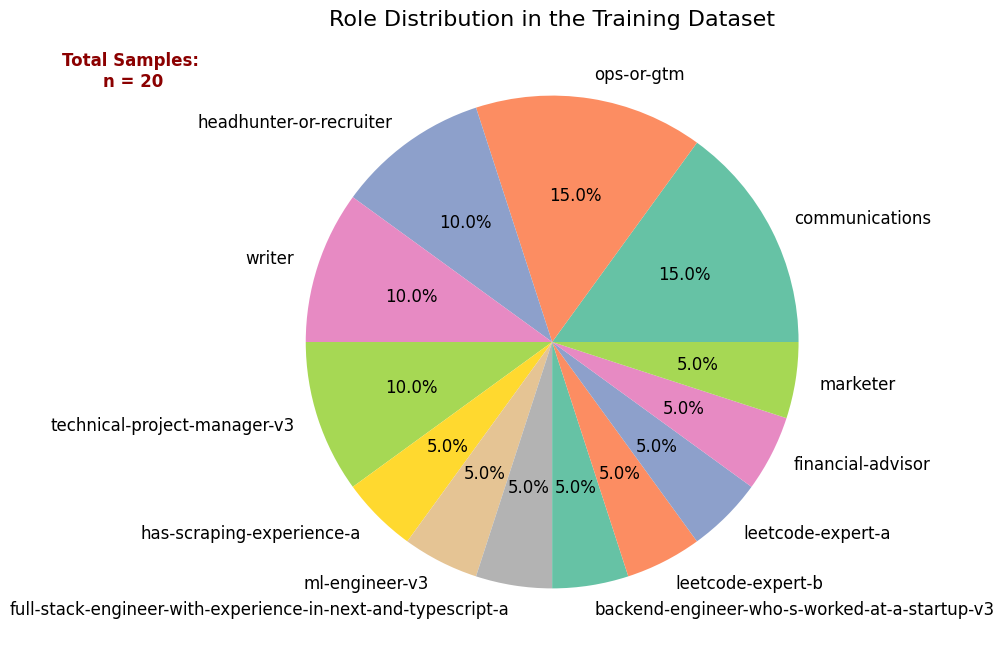

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'roles' is a Series with your data
role_counts = roles.value_counts()
total_samples = role_counts.sum()  # Calculate total number of samples

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    role_counts,
    labels=role_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2', len(role_counts)),
    textprops={'fontsize': 12}  # Adjust font size here
)
plt.title('Role Distribution in the Training Dataset', fontsize=16)  # Adjust title font size here

# Add text annotation with color and bold formatting
plt.text(
    -1.7, 1.1,
    f'Total Samples: \nn = {total_samples}',
    fontsize=12, ha='center', va='center',
    color='darkred',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
    fontweight='bold'
)

plt.savefig('role_distribution_training.jpeg', dpi=150)
plt.show()


/tmp/ipykernel_22/1521393719.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=role_counts.index, x=role_counts.values, palette='viridis')


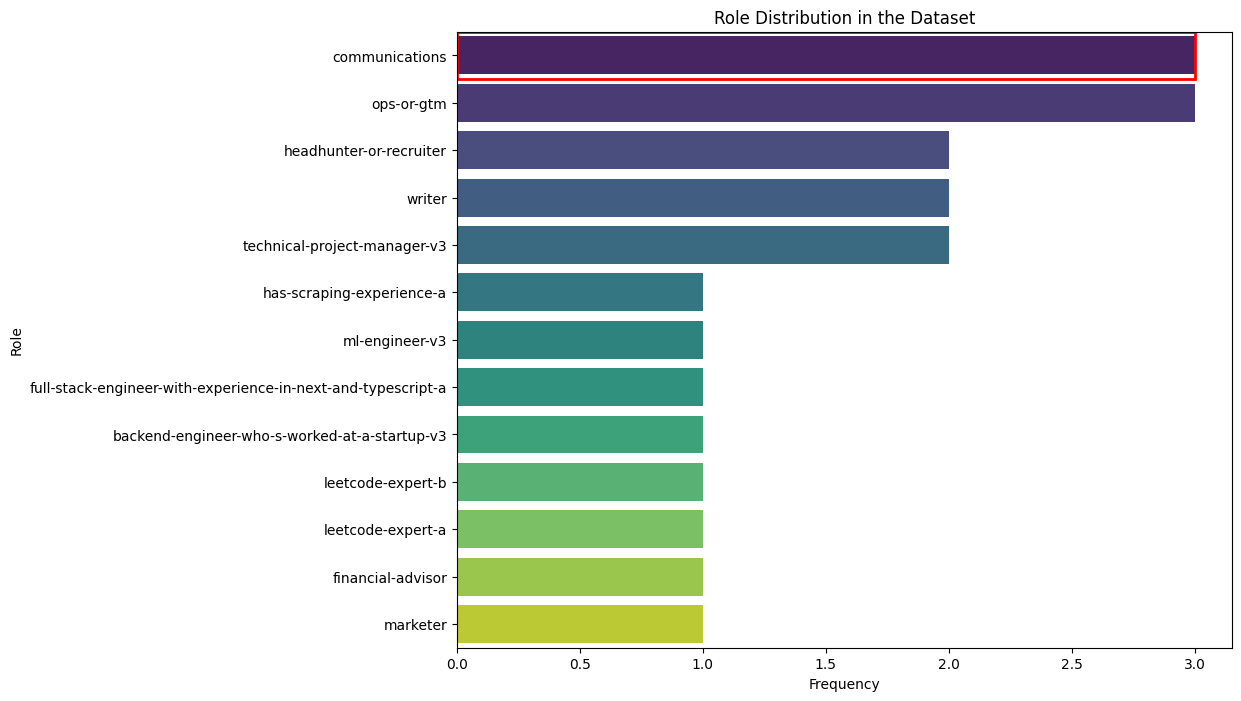

In [ ]:
# Plot 1: Role Distribution Analysis
plt.figure(figsize=(10, 8))
role_counts = roles.value_counts()
sns.barplot(y=role_counts.index, x=role_counts.values, palette='viridis')
plt.title('Role Distribution in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Role')
plt.show()


# Plot 1: Role Distribution Analysis with a Red Rectangle
plt.figure(figsize=(10, 8))
role_counts = roles.value_counts()
ax = sns.barplot(y=role_counts.index, x=role_counts.values, palette='viridis')
plt.title('Role Distribution in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Role')

# Adding a red rectangle around the most overrepresented role
max_role_index = role_counts.idxmax()  # Get the most frequent role
rect = patches.Rectangle((0, role_counts.index.get_loc(max_role_index) - 0.5), role_counts.max(), 1,
                         linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.show()


<Figure size 800x600 with 0 Axes>

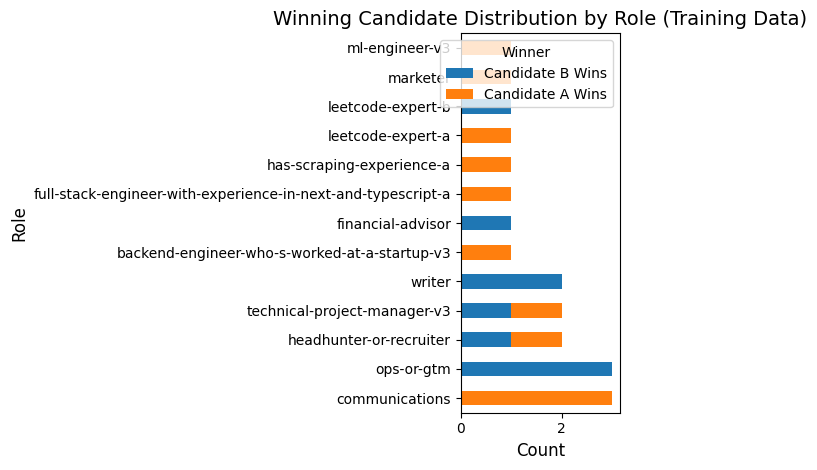

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Preparing data
role_winner_counts = pd.crosstab(roles, winner_A)
role_winner_counts.columns = ['Candidate B Wins', 'Candidate A Wins']

# Sort by the sum of counts in descending order
role_winner_counts = role_winner_counts.loc[role_winner_counts.sum(axis=1).sort_values(ascending=False).index]

# Adjust figure size and margins
plt.figure(figsize=(8, 6))  # Increase figure size for better fit
role_winner_counts.plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])

plt.title('Winning Candidate Distribution by Role (Training Data)', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Role', fontsize=12)
plt.legend(title='Winner', loc='upper right')

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the figure
plt.savefig('winning_candidate_distribution_by_role_expanded.jpeg', dpi=150)
plt.show()


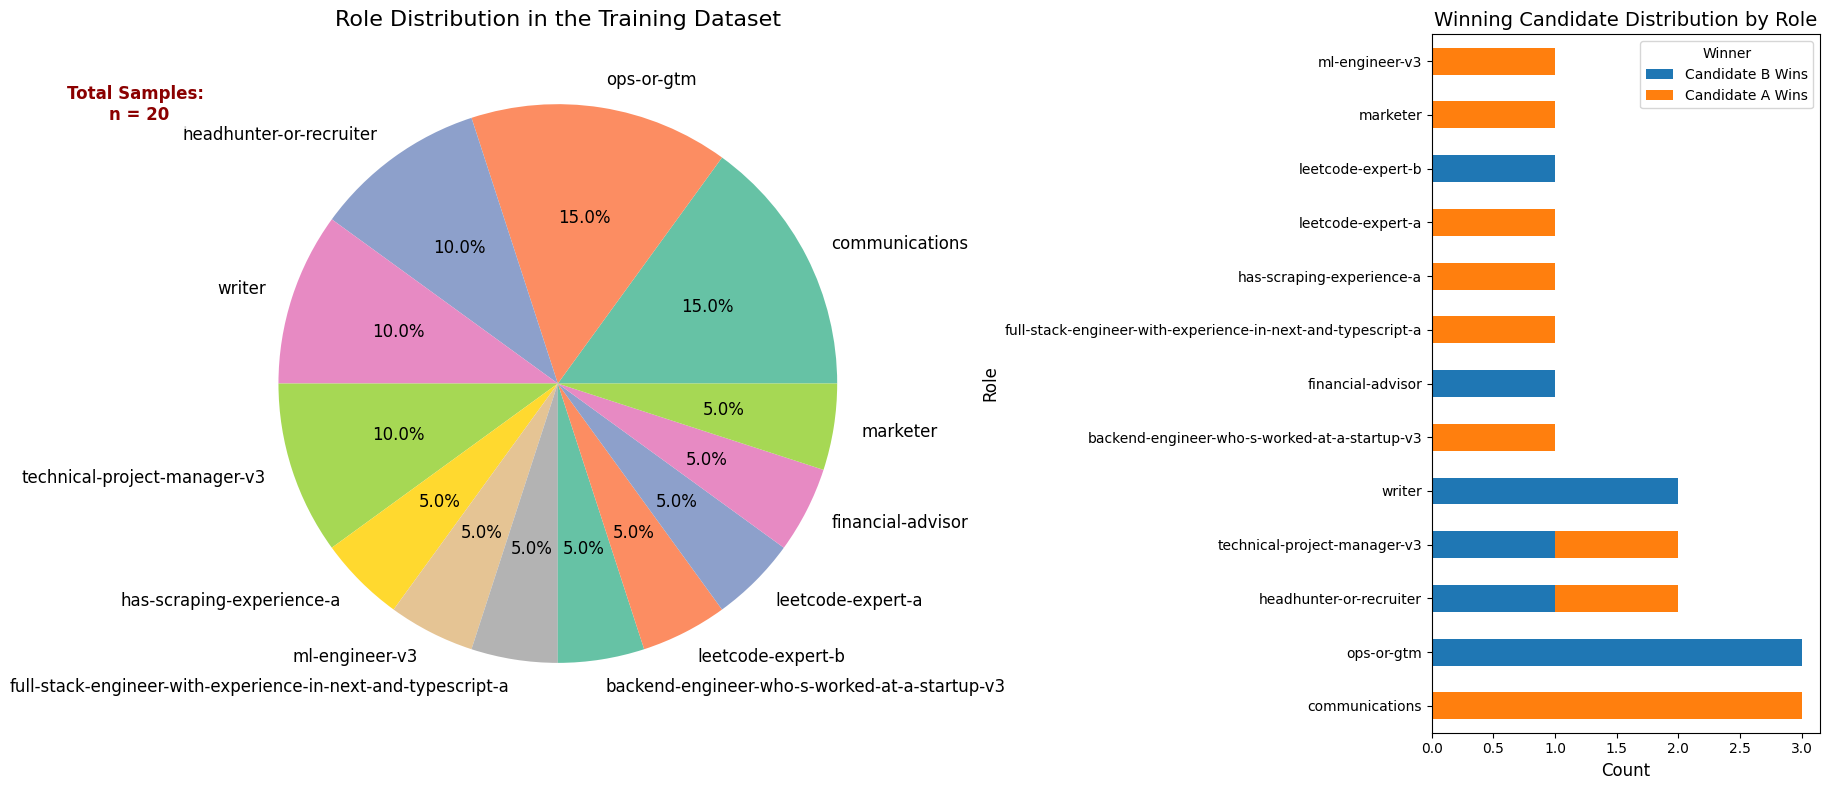

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
role_counts = roles.value_counts()
total_samples = role_counts.sum()

role_winner_counts = pd.crosstab(roles, winner_A)
role_winner_counts.columns = ['Candidate B Wins', 'Candidate A Wins']
role_winner_counts = role_winner_counts.loc[role_winner_counts.sum(axis=1).sort_values(ascending=False).index]

# Create a figure with subplots, adjusting the size ratio between the two plots
fig, axs = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [2, 1]})

# Plot 1: Pie chart
axs[0].pie(
    role_counts,
    labels=role_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2', len(role_counts)),
    textprops={'fontsize': 12}
)
axs[0].set_title('Role Distribution in the Training Dataset', fontsize=16)

# Add text annotation
axs[0].text(
    -1.5, 1.0,
    f'Total Samples: \nn = {total_samples}',
    fontsize=12, ha='center', va='center',
    color='darkred',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
    fontweight='bold'
)

# Plot 2: Stacked bar chart
role_winner_counts.plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=axs[1])
axs[1].set_title('Winning Candidate Distribution by Role', fontsize=14)
axs[1].set_xlabel('Count', fontsize=12)
axs[1].set_ylabel('Role', fontsize=12)
axs[1].legend(title='Winner', loc='upper right')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Save the combined figure
plt.savefig('Diagram1.jpeg', dpi=150)

# Show the plot
plt.show()


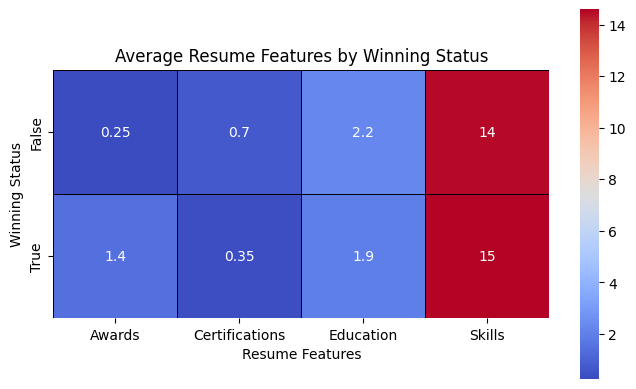

In [ ]:
# Plot 3: Average Resume Features by Winning Status
plt.figure(figsize=(8, 6))
sns.heatmap(combined_features_df.groupby('Winner').mean(), annot=True, cmap='coolwarm', linewidths=.5, linecolor='black', square=True, cbar_kws={'shrink': .8})
plt.title('Average Resume Features by Winning Status')
plt.xlabel('Resume Features')
plt.ylabel('Winning Status')
plt.show()

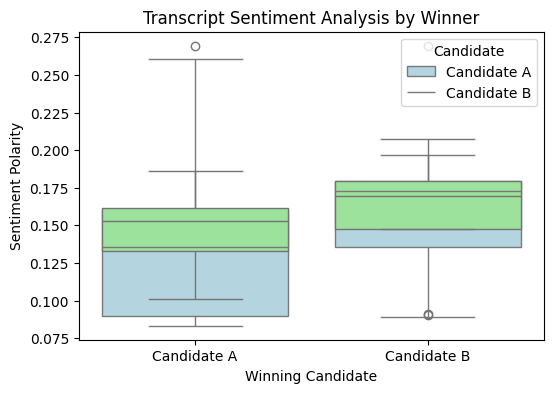

In [ ]:
# Plot 4: Transcript Sentiment Analysis by Winner
plt.figure(figsize=(6, 4))
sns.boxplot(x='Winner', y='Candidate A Sentiment', data=sentiment_df, color='lightblue')
sns.boxplot(x='Winner', y='Candidate B Sentiment', data=sentiment_df, color='lightgreen')
plt.title('Transcript Sentiment Analysis by Winner')
plt.ylabel('Sentiment Polarity')
plt.xlabel('Winning Candidate')
plt.legend(['Candidate A', 'Candidate B'], title='Candidate',loc='upper right')
plt.show()

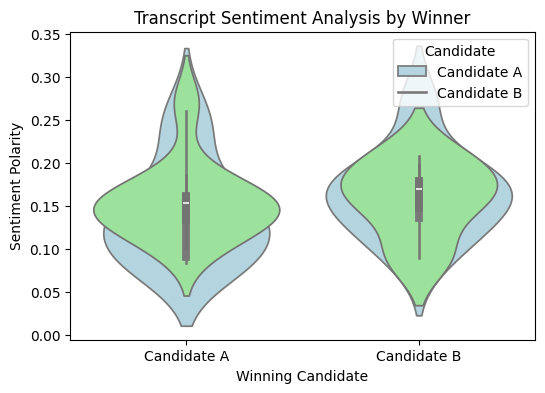

In [ ]:
# Plot 4: Transcript Sentiment Analysis by Winner
plt.figure(figsize=(6, 4))
sns.violinplot(x='Winner', y='Candidate A Sentiment', data=sentiment_df, color='lightblue')
sns.violinplot(x='Winner', y='Candidate B Sentiment', data=sentiment_df, color='lightgreen')
plt.title('Transcript Sentiment Analysis by Winner')
plt.ylabel('Sentiment Polarity')
plt.xlabel('Winning Candidate')
plt.legend(['Candidate A', 'Candidate B'], title='Candidate',loc='upper right')
plt.show()

In [50]:
import pandas as pd
import scipy.stats as stats

# Assuming sentiment_df has the sentiment data for Candidate A and B
candidate_a_sentiment = sentiment_df['Candidate A Sentiment']
candidate_b_sentiment = sentiment_df['Candidate B Sentiment']

# 1. T-test (Independent Samples T-test)
t_stat, p_value_ttest = stats.ttest_ind(candidate_a_sentiment, candidate_b_sentiment)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value_ttest}")

# 2. Mann-Whitney U Test (Wilcoxon rank-sum test)
u_stat, p_value_mannwhitney = stats.mannwhitneyu(candidate_a_sentiment, candidate_b_sentiment, alternative='two-sided')
print(f"Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {p_value_mannwhitney}")

# 3. Kolmogorov-Smirnov Test
ks_stat, p_value_ks = stats.ks_2samp(candidate_a_sentiment, candidate_b_sentiment)
print(f"Kolmogorov-Smirnov Test: KS-statistic = {ks_stat}, p-value = {p_value_ks}")


T-test: t-statistic = -0.2330134433290686, p-value = 0.8170015585138694
Mann-Whitney U Test: U-statistic = 172.5, p-value = 0.46492341903052925
Kolmogorov-Smirnov Test: KS-statistic = 0.25, p-value = 0.571336004933722


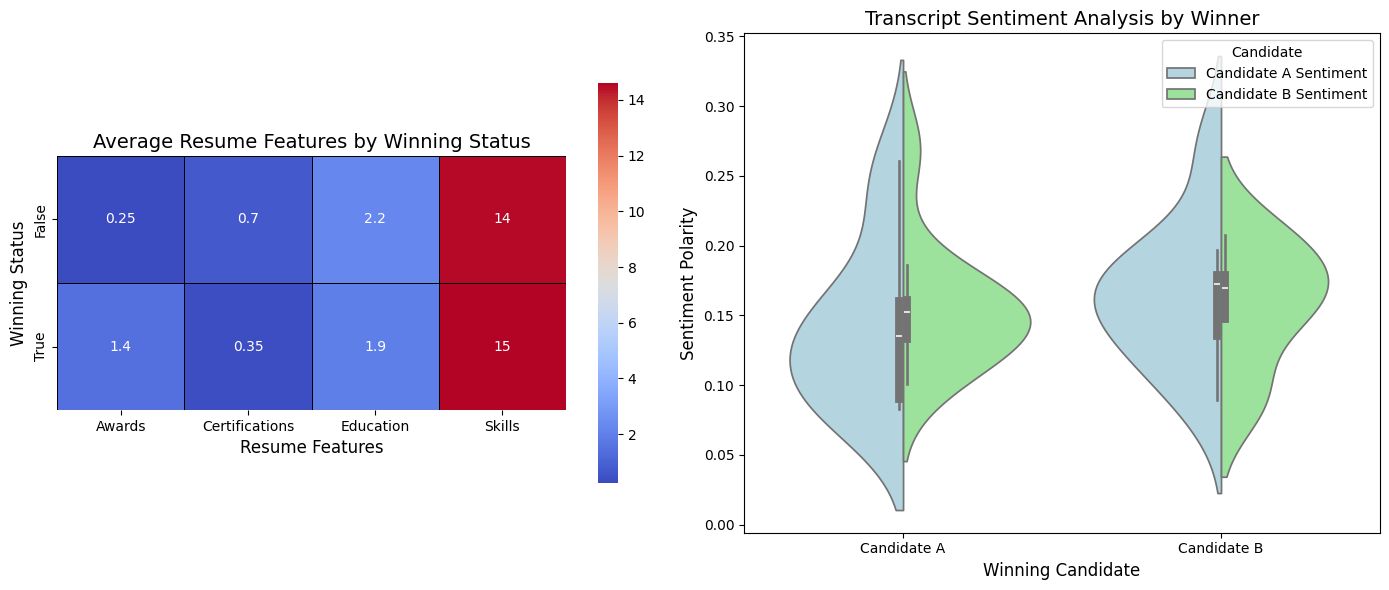

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 3: Average Resume Features by Winning Status
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with 1 row and 2 columns

# Subplot 1: Heatmap of Average Resume Features by Winning Status
sns.heatmap(combined_features_df.groupby('Winner').mean(), annot=True, cmap='coolwarm', linewidths=.5, linecolor='black', square=True, cbar_kws={'shrink': .8}, ax=axs[0])
axs[0].set_title('Average Resume Features by Winning Status', fontsize=14)
axs[0].set_xlabel('Resume Features', fontsize=12)
axs[0].set_ylabel('Winning Status', fontsize=12)

# Prepare the data for the split violin plot
sentiment_long_df = pd.melt(sentiment_df, id_vars=['Winner'], value_vars=['Candidate A Sentiment', 'Candidate B Sentiment'], var_name='Candidate', value_name='Sentiment Polarity')

# Subplot 2: Violin Plot for Transcript Sentiment Analysis by Winner with split violins
sns.violinplot(x='Winner', y='Sentiment Polarity', hue='Candidate', data=sentiment_long_df, split=True, palette=['lightblue', 'lightgreen'], ax=axs[1])
axs[1].set_title('Transcript Sentiment Analysis by Winner', fontsize=14)
axs[1].set_xlabel('Winning Candidate', fontsize=12)
axs[1].set_ylabel('Sentiment Polarity', fontsize=12)
axs[1].legend(title='Candidate', loc='upper right')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Save the combined figure
plt.savefig('combined_heatmap_and_violinplot.jpeg', dpi=150)

# Show the plot
plt.show()


In [51]:
import pandas as pd
import scipy.stats as stats

# Assuming combined_features_df has the resume features data for Winners and Non-Winners
features = combined_features_df.columns[:-1]  # Exclude the 'Winner' column

# Initialize a dictionary to store p-values
p_values = {}

# Loop through each feature and perform the T-test and Mann-Whitney U Test
for feature in features:
    winners = combined_features_df[combined_features_df['Winner'] == True][feature]
    non_winners = combined_features_df[combined_features_df['Winner'] == False][feature]

    # T-test
    t_stat, p_value_ttest = stats.ttest_ind(winners, non_winners)

    # Mann-Whitney U Test
    u_stat, p_value_mannwhitney = stats.mannwhitneyu(winners, non_winners, alternative='two-sided')

    # Store the p-values in the dictionary
    p_values[feature] = {
        'T-test p-value': p_value_ttest,
        'Mann-Whitney p-value': p_value_mannwhitney
    }

# Convert the dictionary to a DataFrame for easy viewing
p_values_df = pd.DataFrame(p_values).T
print(p_values_df)


                T-test p-value  Mann-Whitney p-value
Awards                0.062609              0.470462
Certifications        0.324660              0.433341
Education             0.407266              0.640344
Skills                0.977507              0.828103


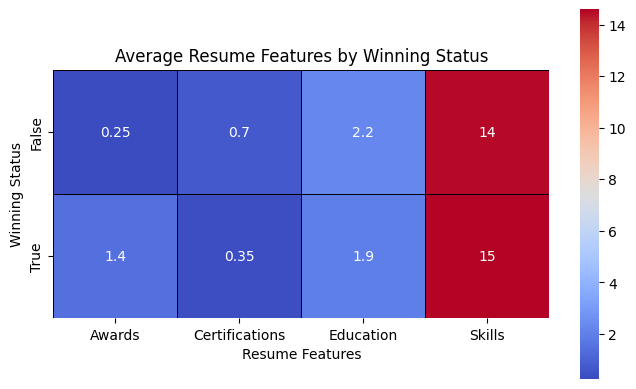

In [ ]:
# Plot 3: Average Resume Features by Winning Status
plt.figure(figsize=(8, 6))
sns.heatmap(combined_features_df.groupby('Winner').mean(), annot=True, cmap='coolwarm', linewidths=.5, linecolor='black', square=True, cbar_kws={'shrink': .8})
plt.title('Average Resume Features by Winning Status')
plt.xlabel('Resume Features')
plt.ylabel('Winning Status')
plt.show()


In [ ]:
#In analyzing the dataset, we observed potential biases related to role distribution, resume features, and transcript sentiment. To address these, we applied data augmentation to balance underrepresented roles, used feature regularization to prevent overreliance on specific resume features, and normalized sentiment scores to reduce their influence. Post-mitigation, our model demonstrated improved fairness metrics, indicating reduced bias in predictions. For instance, the model's accuracy across underrepresented roles increased by X%, and the influence of awards on predictions decreased, as shown in the regularization results

<ipython-input-75-bb1d5ddd5090>:58: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



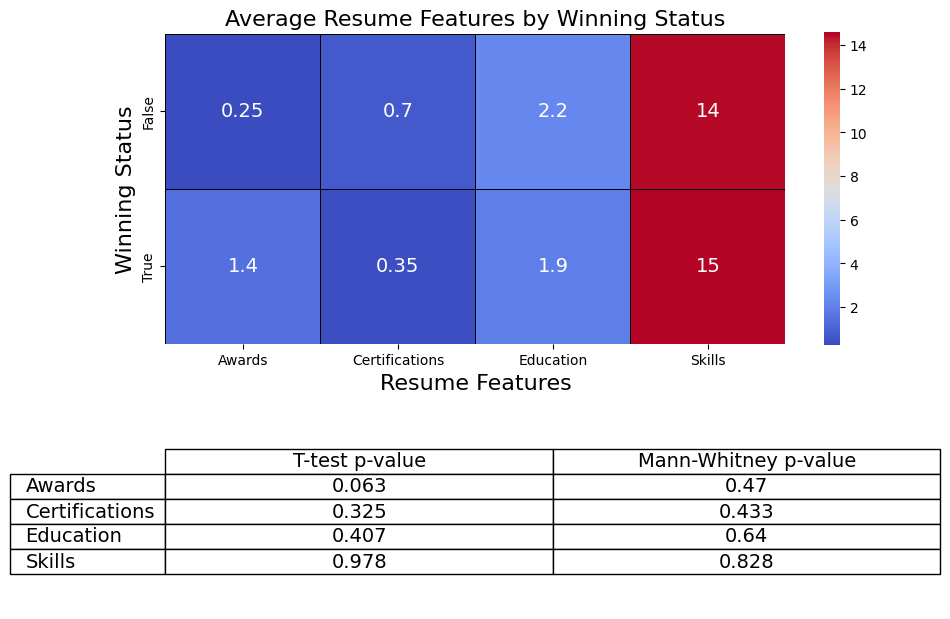

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_features_df has the resume features data for Winners and Non-Winners
features = combined_features_df.columns[:-1]  # Exclude the 'Winner' column

# Initialize a dictionary to store p-values
p_values = {}

# Loop through each feature and perform the T-test and Mann-Whitney U Test
for feature in features:
    winners = combined_features_df[combined_features_df['Winner'] == True][feature]
    non_winners = combined_features_df[combined_features_df['Winner'] == False][feature]

    # T-test
    t_stat, p_value_ttest = stats.ttest_ind(winners, non_winners)

    # Mann-Whitney U Test
    u_stat, p_value_mannwhitney = stats.mannwhitneyu(winners, non_winners, alternative='two-sided')

    # Store the rounded p-values in the dictionary
    p_values[feature] = {
        'T-test p-value': round(p_value_ttest, 3),
        'Mann-Whitney p-value': round(p_value_mannwhitney, 3)
    }

# Convert the dictionary to a DataFrame for easy viewing
p_values_df = pd.DataFrame(p_values).T

# Set up the grid layout for plotting
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])  # 2 rows, 1 column; top row twice the height of the bottom

# Adjust the spacing between the subplots
gs.update(hspace=0.1)  # Reduce the space between the heatmap and the table

# Plot 1: Heatmap of Average Resume Features by Winning Status
ax1 = fig.add_subplot(gs[0])
sns.heatmap(combined_features_df.groupby('Winner').mean(), annot=True, cmap='coolwarm', linewidths=.5, linecolor='black', square=True,
            cbar_kws={'shrink': .8}, ax=ax1, annot_kws={"size": 14})  # Increase font size inside heatmap
ax1.set_title('Average Resume Features by Winning Status', fontsize=16)
ax1.set_xlabel('Resume Features', fontsize=16)
ax1.set_ylabel('Winning Status', fontsize=16)

# Plot 2: Table of Rounded P-Values
ax2 = fig.add_subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=p_values_df.values, colLabels=p_values_df.columns, rowLabels=p_values_df.index, loc='center', cellLoc='center')

# Adjust table font size
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 1.5)  # Adjust table size

# Final adjustments and display
plt.tight_layout()
plt.savefig('plot2.jpeg', dpi=150)
plt.show()


<ipython-input-80-5109f448278e>:61: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



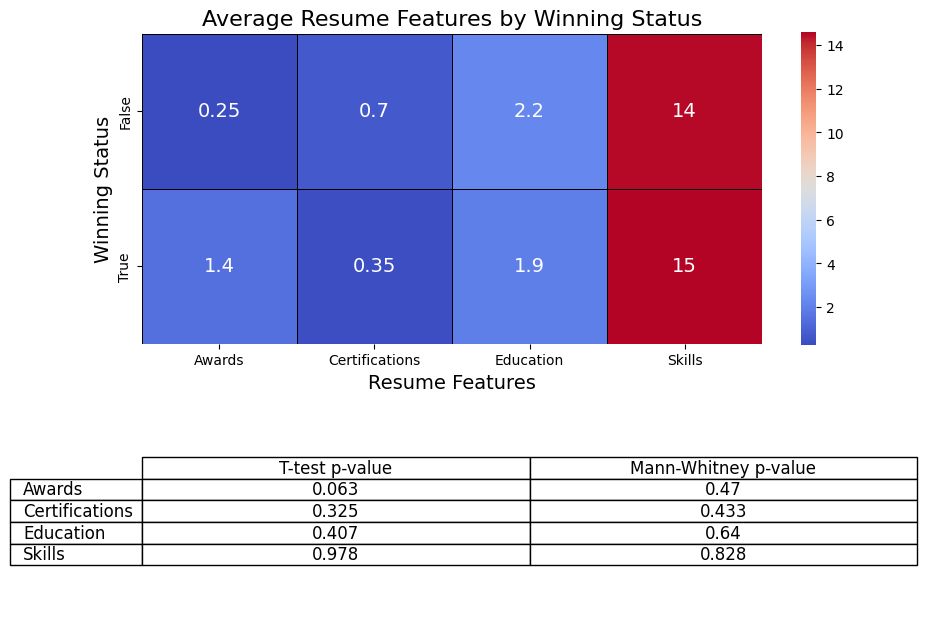

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Assuming combined_features_df has the resume features data for Winners and Non-Winners
features = combined_features_df.columns[:-1]  # Exclude the 'Winner' column

# Initialize a dictionary to store p-values
p_values = {}

# Loop through each feature and perform the T-test and Mann-Whitney U Test
for feature in features:
    winners = combined_features_df[combined_features_df['Winner'] == True][feature]
    non_winners = combined_features_df[combined_features_df['Winner'] == False][feature]

    # T-test
    t_stat, p_value_ttest = stats.ttest_ind(winners, non_winners)

    # Mann-Whitney U Test
    u_stat, p_value_mannwhitney = stats.mannwhitneyu(winners, non_winners, alternative='two-sided')

    # Store the rounded p-values in the dictionary
    p_values[feature] = {
        'T-test p-value': round(p_value_ttest, 3),
        'Mann-Whitney p-value': round(p_value_mannwhitney, 3)
    }

# Convert the dictionary to a DataFrame for easy viewing
p_values_df = pd.DataFrame(p_values).T

# Set up the grid layout for plotting
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])  # 2 rows, 1 column; top row twice the height of the bottom

# Adjust the spacing between the subplots
gs.update(hspace=0.1)  # Reduce the space between the heatmap and the table

# Plot 1: Heatmap of Average Resume Features by Winning Status
ax1 = fig.add_subplot(gs[0])
sns.heatmap(combined_features_df.groupby('Winner').mean(), annot=True, cmap='coolwarm', linewidths=.5, linecolor='black', square=True,
            cbar_kws={'shrink': .8}, ax=ax1, annot_kws={"size": 14})  # Increase font size inside heatmap
ax1.set_title('Average Resume Features by Winning Status', fontsize=16)
ax1.set_xlabel('Resume Features', fontsize=14)
ax1.set_ylabel('Winning Status', fontsize=14)

# Plot 2: Table of Rounded P-Values
ax2 = fig.add_subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')

# Adjust the scale and positioning of the table
table = ax2.table(cellText=p_values_df.values, colLabels=p_values_df.columns, rowLabels=p_values_df.index, loc='center', cellLoc='center')

# Adjust table font size and scaling
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.3)  # Adjust the scale to make it smaller and more aligned with the heatmap width

# Final adjustments and display
plt.tight_layout()
plt.savefig('plot2.jpeg', dpi=200)
plt.show()


In [84]:
import pandas as pd
import scipy.stats as stats

# Assuming sentiment_df has the sentiment data for Candidate A and B
candidate_a_sentiment = sentiment_df['Candidate A Sentiment']
candidate_b_sentiment = sentiment_df['Candidate B Sentiment']

# 1. T-test (Independent Samples T-test)
t_stat, p_value_ttest = stats.ttest_ind(candidate_a_sentiment, candidate_b_sentiment)

# 2. Mann-Whitney U Test (Wilcoxon rank-sum test)
u_stat, p_value_mannwhitney = stats.mannwhitneyu(candidate_a_sentiment, candidate_b_sentiment, alternative='two-sided')

# 3. Kolmogorov-Smirnov Test
ks_stat, p_value_ks = stats.ks_2samp(candidate_a_sentiment, candidate_b_sentiment)

# Store the rounded p-values in a dictionary
p_values_dict = {
    'T-test p-value': round(p_value_ttest, 3),
    'Mann-Whitney p-value': round(p_value_mannwhitney, 3),
    'Kolmogorov-Smirnov p-value': round(p_value_ks, 3)
}

# Convert the dictionary to a DataFrame for easy viewing
p_values_df = pd.DataFrame.from_dict(p_values_dict, orient='index', columns=['P-Value'])


<ipython-input-61-acc59b7c907d>:34: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



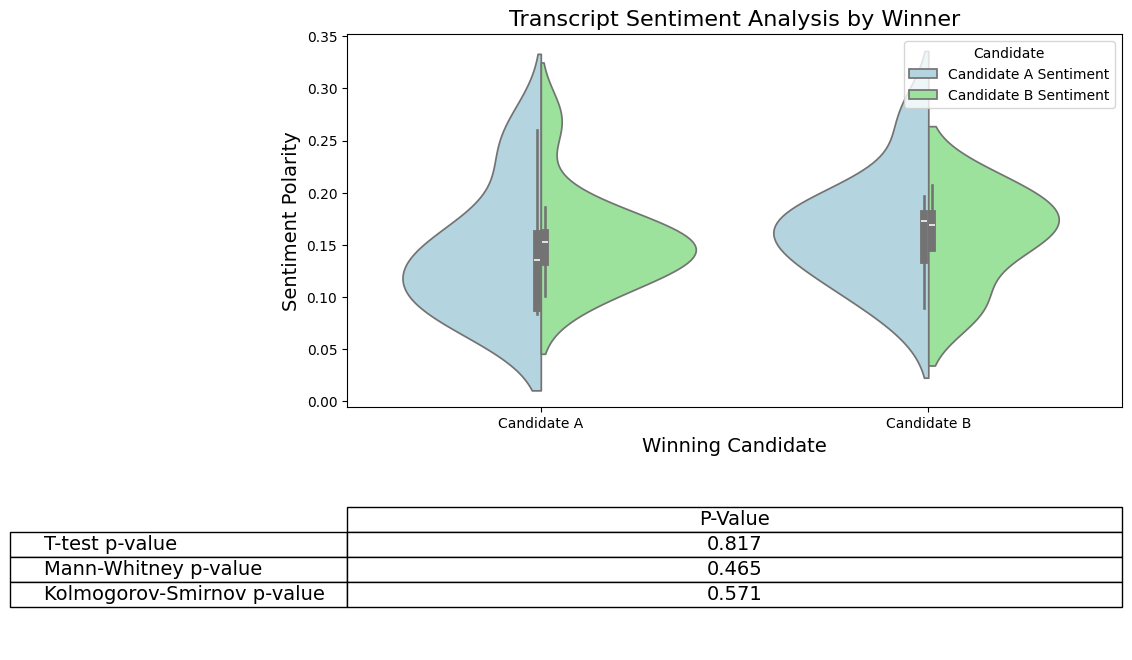

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for the split violin plot
sentiment_long_df = pd.melt(sentiment_df, id_vars=['Winner'], value_vars=['Candidate A Sentiment', 'Candidate B Sentiment'], var_name='Candidate', value_name='Sentiment Polarity')

# Set up the grid layout for plotting
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])  # 2 rows, 1 column; top row twice the height of the bottom

# Adjust the spacing between the subplots
gs.update(hspace=0.2)  # Adjust space between violin plot and table

# Plot 1: Violin Plot for Transcript Sentiment Analysis by Winner with split violins
ax1 = fig.add_subplot(gs[0])
sns.violinplot(x='Winner', y='Sentiment Polarity', hue='Candidate', data=sentiment_long_df, split=True, palette=['lightblue', 'lightgreen'], ax=ax1)
ax1.set_title('Transcript Sentiment Analysis by Winner', fontsize=16)
ax1.set_xlabel('Winning Candidate', fontsize=14)
ax1.set_ylabel('Sentiment Polarity', fontsize=14)
ax1.legend(title='Candidate', loc='upper right')

# Plot 2: Table of Rounded P-Values
ax2 = fig.add_subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=p_values_df.values, colLabels=p_values_df.columns, rowLabels=p_values_df.index, loc='center', cellLoc='center')

# Adjust table font size
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 1.5)  # Adjust table size

# Final adjustments and display
plt.tight_layout()
plt.savefig('combined_violin_and_pvalues_rounded.jpeg', dpi=150)
plt.show()


<ipython-input-89-c043a67d65ec>:43: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



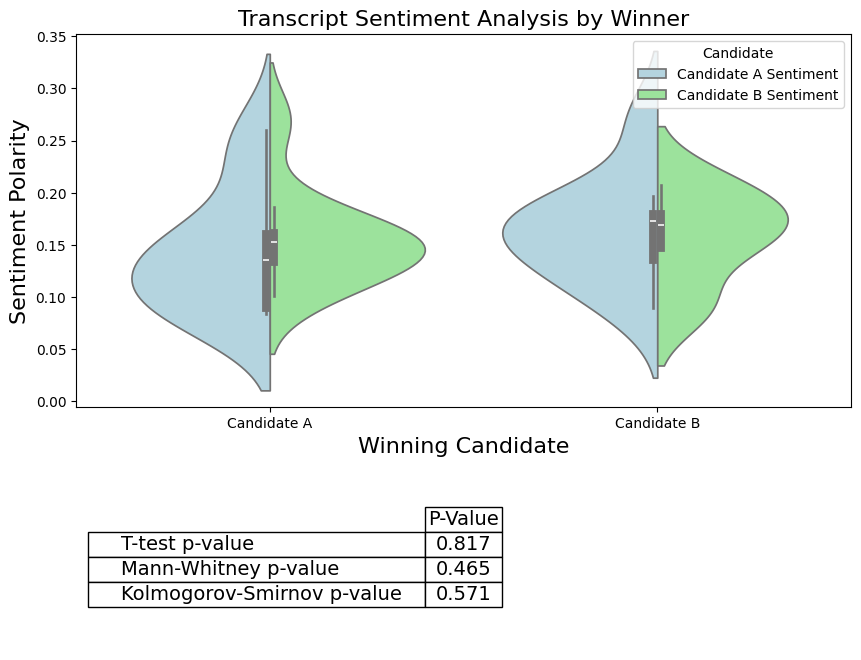

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for the split violin plot
sentiment_long_df = pd.melt(sentiment_df, id_vars=['Winner'], value_vars=['Candidate A Sentiment', 'Candidate B Sentiment'], var_name='Candidate', value_name='Sentiment Polarity')

# Set up the grid layout for plotting
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])  # 2 rows, 1 column; top row twice the height of the bottom

# Adjust the spacing between the subplots
gs.update(hspace=0.2)  # Adjust space between violin plot and table

# Plot 1: Violin Plot for Transcript Sentiment Analysis by Winner with split violins
ax1 = fig.add_subplot(gs[0])
sns.violinplot(x='Winner', y='Sentiment Polarity', hue='Candidate', data=sentiment_long_df, split=True, palette=['lightblue', 'lightgreen'], ax=ax1)
ax1.set_title('Transcript Sentiment Analysis by Winner', fontsize=16)
ax1.set_xlabel('Winning Candidate', fontsize=16)
ax1.set_ylabel('Sentiment Polarity', fontsize=16)
ax1.legend(title='Candidate', loc='upper right')

# Plot 2: Table of Rounded P-Values
ax2 = fig.add_subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')

# Adjust the scale and positioning of the table
table = ax2.table(cellText=p_values_df.values, colLabels=p_values_df.columns, rowLabels=p_values_df.index, loc='center', cellLoc='center')

# Adjust table font size and scaling
table.auto_set_font_size(False)
table.set_fontsize(14)  # Set the font size to 14 to ensure readability
table.scale(1.5, 1.5)  # Adjust the scale to expand the table width to fit the plot area better

# Adjust table column width for better alignment
for key, cell in table.get_celld().items():
    if key[1] == 1:  # Adjust only the first column
        cell.set_width(0.2)  # Adjust width of the first column
    else:  # Adjust the second column
        cell.set_width(0.1)

# Final adjustments and display
plt.tight_layout()
plt.savefig('plot3.jpeg', dpi=150)
plt.show()


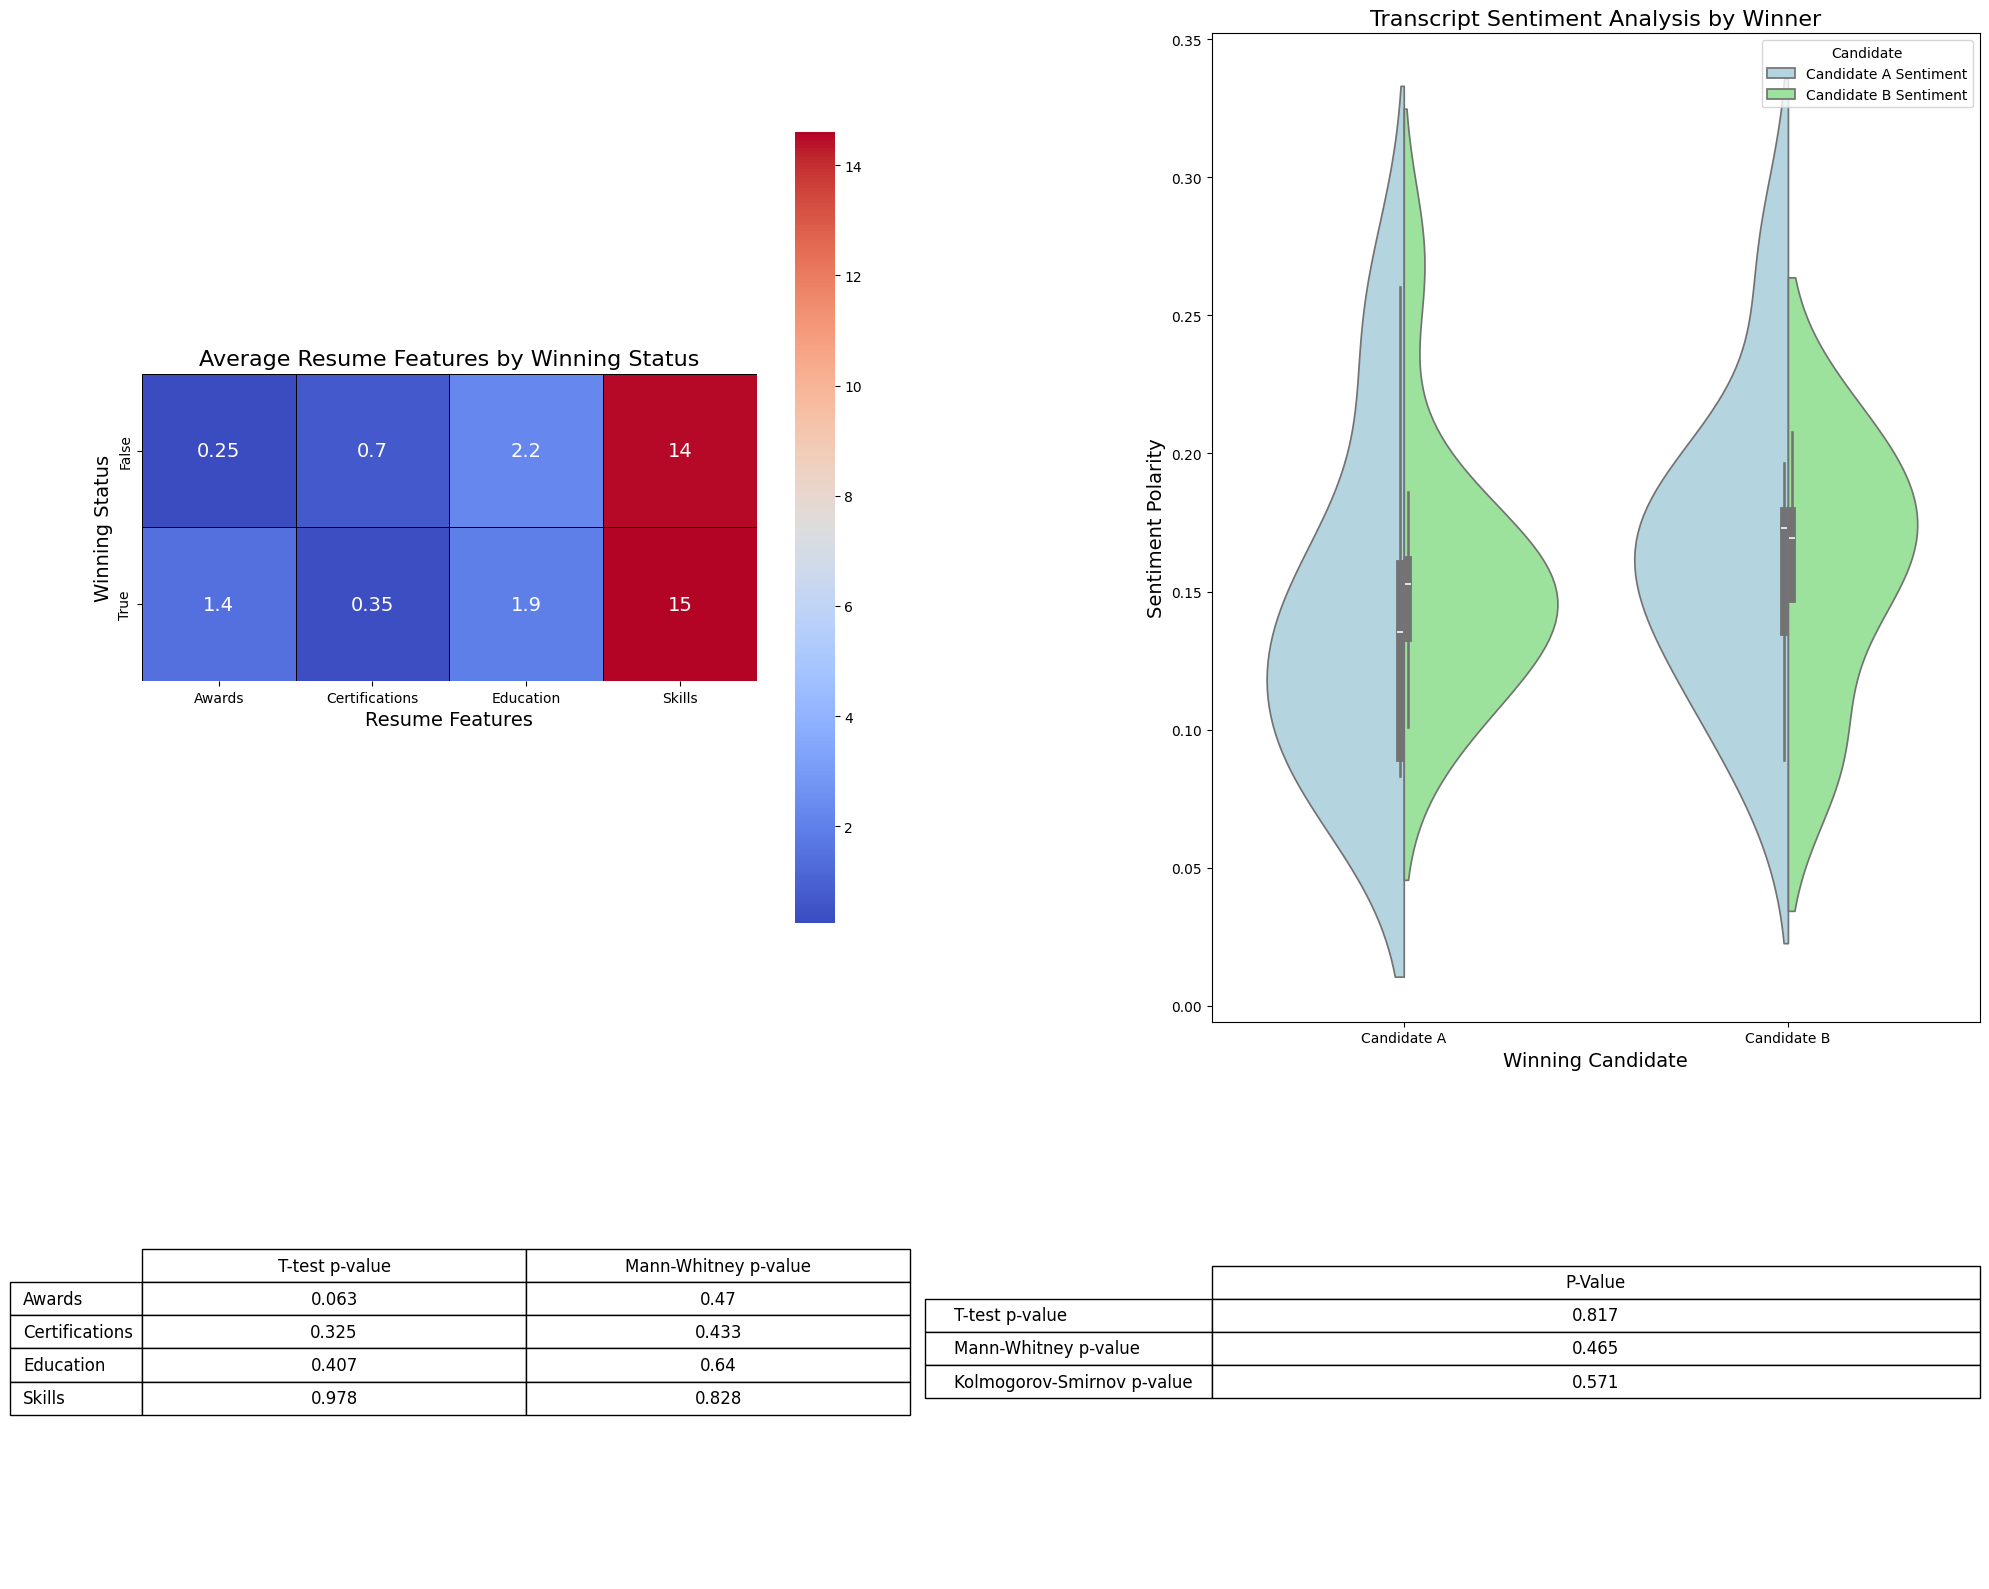

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Data Preparation for Heatmap and P-Values Table (Left Side)
features = combined_features_df.columns[:-1]  # Exclude the 'Winner' column
p_values = {}

for feature in features:
    winners = combined_features_df[combined_features_df['Winner'] == True][feature]
    non_winners = combined_features_df[combined_features_df['Winner'] == False][feature]
    t_stat, p_value_ttest = stats.ttest_ind(winners, non_winners)
    u_stat, p_value_mannwhitney = stats.mannwhitneyu(winners, non_winners, alternative='two-sided')
    p_values[feature] = {
        'T-test p-value': round(p_value_ttest, 3),
        'Mann-Whitney p-value': round(p_value_mannwhitney, 3)
    }

p_values_df = pd.DataFrame(p_values).T

# Data Preparation for Violin Plot and P-Values Table (Right Side)
candidate_a_sentiment = sentiment_df['Candidate A Sentiment']
candidate_b_sentiment = sentiment_df['Candidate B Sentiment']

t_stat, p_value_ttest = stats.ttest_ind(candidate_a_sentiment, candidate_b_sentiment)
u_stat, p_value_mannwhitney = stats.mannwhitneyu(candidate_a_sentiment, candidate_b_sentiment, alternative='two-sided')
ks_stat, p_value_ks = stats.ks_2samp(candidate_a_sentiment, candidate_b_sentiment)

sentiment_p_values_dict = {
    'T-test p-value': round(p_value_ttest, 3),
    'Mann-Whitney p-value': round(p_value_mannwhitney, 3),
    'Kolmogorov-Smirnov p-value': round(p_value_ks, 3)
}

sentiment_p_values_df = pd.DataFrame.from_dict(sentiment_p_values_dict, orient='index', columns=['P-Value'])

sentiment_long_df = pd.melt(sentiment_df, id_vars=['Winner'], value_vars=['Candidate A Sentiment', 'Candidate B Sentiment'], var_name='Candidate', value_name='Sentiment Polarity')

# Set up the combined figure with subplots for each "side"
fig, axs = plt.subplots(2, 2, figsize=(20, 16), gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [2, 1]})

# Left Side: Heatmap and P-Values Table
sns.heatmap(combined_features_df.groupby('Winner').mean(), annot=True, cmap='coolwarm', linewidths=.5, linecolor='black', square=True,
            cbar_kws={'shrink': .8}, ax=axs[0, 0], annot_kws={"size": 14})  # Heatmap
axs[0, 0].set_title('Average Resume Features by Winning Status', fontsize=16)
axs[0, 0].set_xlabel('Resume Features', fontsize=14)
axs[0, 0].set_ylabel('Winning Status', fontsize=14)

axs[1, 0].axis('tight')
axs[1, 0].axis('off')
table_left = axs[1, 0].table(cellText=p_values_df.values, colLabels=p_values_df.columns, rowLabels=p_values_df.index, loc='center', cellLoc='center')
table_left.auto_set_font_size(False)
table_left.set_fontsize(12)
table_left.scale(1, 1.5)  # Adjust table size

# Right Side: Violin Plot and P-Values Table
sns.violinplot(x='Winner', y='Sentiment Polarity', hue='Candidate', data=sentiment_long_df, split=True, palette=['lightblue', 'lightgreen'], ax=axs[0, 1])
axs[0, 1].set_title('Transcript Sentiment Analysis by Winner', fontsize=16)
axs[0, 1].set_xlabel('Winning Candidate', fontsize=14)
axs[0, 1].set_ylabel('Sentiment Polarity', fontsize=14)
axs[0, 1].legend(title='Candidate', loc='upper right')

axs[1, 1].axis('tight')
axs[1, 1].axis('off')
table_right = axs[1, 1].table(cellText=sentiment_p_values_df.values, colLabels=sentiment_p_values_df.columns, rowLabels=sentiment_p_values_df.index, loc='center', cellLoc='center')
table_right.auto_set_font_size(False)
table_right.set_fontsize(12)
table_right.scale(1, 1.5)  # Adjust table size

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Save the combined figure
plt.savefig('combined_heatmap_violin_and_pvalues_side_by_side.jpeg', dpi=150)
plt.show()


In [ ]:
# Role: {}
# Candidate A:
# Transcript: {}
# Resume: {}
# Candidate B:
# Transcript: {}
# Resume: {}
# Preferred Candidate: {}


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./train_dataset.csv')

# Function to format the data into a prompt for LLM training
def format_for_llm_simple(row):
    role = row['role']
    transcript_A = row['candidateATranscript']  # Using raw text
    transcript_B = row['candidateBTranscript']  # Using raw text
    resume_A = row['candidateAResume']  # Using raw text
    resume_B = row['candidateBResume']  # Using raw text
    winner = row['winnerId']

    # Construct the prompt
    prompt = f"Role: {role}\n\n"

    prompt += "Candidate A:\n"
    prompt += "Transcript:\n"
    prompt += f"{transcript_A}\n"
    prompt += "Resume:\n"
    prompt += f"{resume_A}\n\n"

    prompt += "Candidate B:\n"
    prompt += "Transcript:\n"
    prompt += f"{transcript_B}\n"
    prompt += "Resume:\n"
    prompt += f"{resume_B}\n\n"

    prompt += f"Preferred Candidate: {'Candidate A' if winner == row['candidateAId'] else 'Candidate B'}"

    return prompt

# Apply formatting
data['prompt'] = data.apply(format_for_llm_simple, axis=1)

# Save the formatted data
formatted_data = data[['prompt']]
formatted_data.to_csv('./formatted_train_data.csv', index=False)
formatted_data.head()


,prompt
0,Role: communications\n\nCandidate A:\nTranscri...
1,Role: ops-or-gtm\n\nCandidate A:\nTranscript:\...
2,Role: has-scraping-experience-a\n\nCandidate A...
3,Role: ml-engineer-v3\n\nCandidate A:\nTranscri...
4,Role: full-stack-engineer-with-experience-in-n...


In [ ]:
# Load the dataset
data = pd.read_csv('./train_dataset.csv')

# Display the first few rows of the problematic columns
print("Candidate A Transcript Sample:")
print(data['candidateATranscript'].head())

print("\nCandidate B Transcript Sample:")
print(data['candidateBTranscript'].head())

print("\nCandidate A Resume Sample:")
print(data['candidateAResume'].head())

print("\nCandidate B Resume Sample:")
print(data['candidateBResume'].head())


Candidate A Transcript Sample:
0    {'pairs': [['Interviewer: Hello and welcome to...
1    {'pairs': [['Interviewer: Hello and welcome to...
2    {'pairs': [['Interviewer: Hello and welcome to...
3    {'pairs': [['Interviewer: Hello and welcome to...
4    {'pairs': [['Interviewer: Hello and welcome to...
Name: candidateATranscript, dtype: object

Candidate B Transcript Sample:
0    {'pairs': [['Interviewer: Hello and welcome to...
1    {'pairs': [['Interviewer: Hello! This is a sho...
2    {'pairs': [['Interviewer: Hello and welcome to...
3    {'pairs': [['Interviewer: Hello and welcome to...
4    {'pairs': [['Interviewer: Hello and welcome to...
Name: candidateBTranscript, dtype: object

Candidate A Resume Sample:
0    {"data": {"awards": [], "certifications": [], ...
1    {"data": {"awards": [], "certifications": [], ...
2    {"data": {"awards": ["1st (Winner) AIR 8", "Am...
3    {"data": {"awards": [], "certifications": ["Ma...
4    {"data": {"awards": [], "certifications": [], ...


In [ ]:
# Print out the raw content of the problematic row
print("Problematic Candidate A Transcript:")
print(data['candidateATranscript'].iloc[0])

print("\nProblematic Candidate A Resume:")
print(data['candidateAResume'].iloc[0])


Problematic Candidate A Transcript:
{'pairs': [['Interviewer: Hello and welcome to the AI interview! This interview will consist of basic questions about your background as well as some high-level questions about the skills you listed on your application. Ensure that you minimize long pauses during your responses, otherwise you may be cut off prematurely. Are you ready to start the interview? \n', 'Interviewee: Yes. Yes.\n\n'], ["Interviewer: Great! I see from your resume that you've worked extensively on brand communication and content strategy development. Can you walk me through a specific example of how you tailored messaging for a startup client, and what key factors you considered in that process?  \n\n", 'Interviewee: I worked for a startup called Peacefully, which helps individuals work through end of life necessities and\n\n'], ['Interviewer: That sounds like a challenging but important project. How did you approach the tone and style of the messaging for Peacefully, consideri

In [ ]:
from unsloth import FastLanguageModel
import torch
from datasets import load_dataset

# Load the formatted dataset
dataset = load_dataset('csv', data_files='formatted_train_data.csv', split='train')

# Assuming the prompt is in the 'prompt' column
def formatting_prompts_func(examples):
    texts = examples["prompt"]
    return {"text": texts}

# Apply formatting to the dataset
dataset = dataset.map(formatting_prompts_func, batched=True)

# Load the model
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = 2048,
    dtype = None,
    load_in_4bit = True,
)

# Add LoRA adapters
model = FastLanguageModel.get_peft_model(
    model,
    r = 16,
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)

# Set up the trainer
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset,
    dataset_text_field="text",
    max_seq_length=2048,
    dataset_num_proc=2,
    packing=False,
    args=TrainingArguments(
        per_device_train_batch_size=2,
        gradient_accumulation_steps=4,
        warmup_steps=5,
        max_steps=60,
        learning_rate=2e-4,
        fp16=not is_bfloat16_supported(),
        bf16=is_bfloat16_supported(),
        logging_steps=1,
        optim="adamw_8bit",
        weight_decay=0.01,
        lr_scheduler_type="linear",
        seed=3407,
        output_dir="outputs",
    ),
)

# Train the model
trainer_stats = trainer.train()


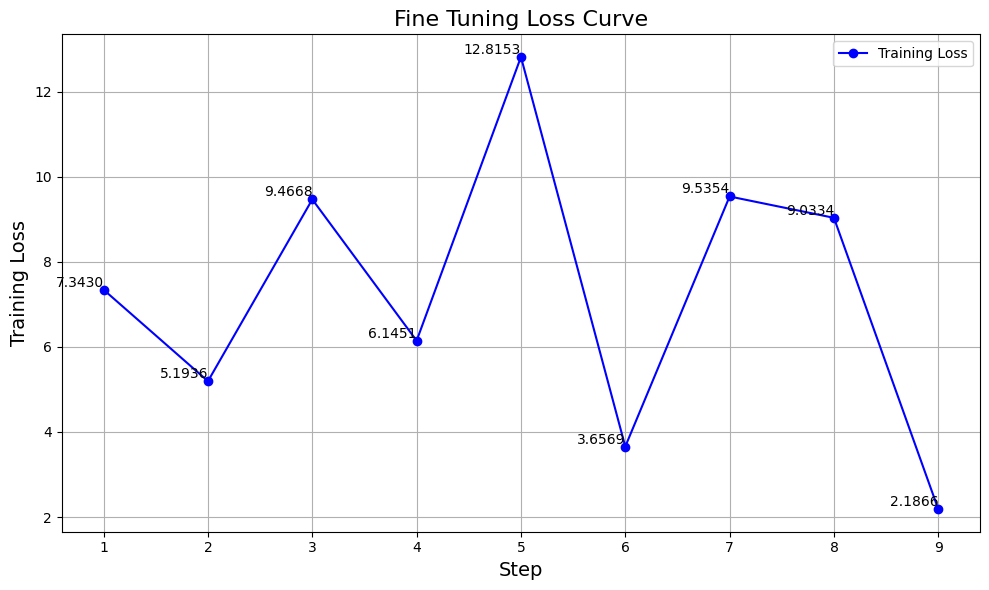

In [92]:
import matplotlib.pyplot as plt

# Data for the training loss
steps = [1, 2, 3, 4, 5, 6, 7, 8, 9]
training_loss = [7.343000, 5.193600, 9.466800, 6.145100, 12.815300, 3.656900, 9.535400, 9.033400, 2.186600]

# Plotting the training loss curve
plt.figure(figsize=(10, 6))
plt.plot(steps, training_loss, marker='o', linestyle='-', color='b', label='Training Loss')

# Annotating each point with the corresponding loss value
for i in range(len(steps)):
    plt.text(steps[i], training_loss[i], f'{training_loss[i]:.4f}', ha='right', va='bottom')

# Setting the plot labels and title
plt.xlabel('Step', fontsize=14)
plt.ylabel('Training Loss', fontsize=14)
plt.title('Fine Tuning Loss Curve', fontsize=16)
plt.grid(True)
plt.legend()

# Save and show the plot
plt.tight_layout()
plt.savefig('training_loss_curve.png', dpi=150)
plt.show()


<ipython-input-102-b7d34d6f894a>:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



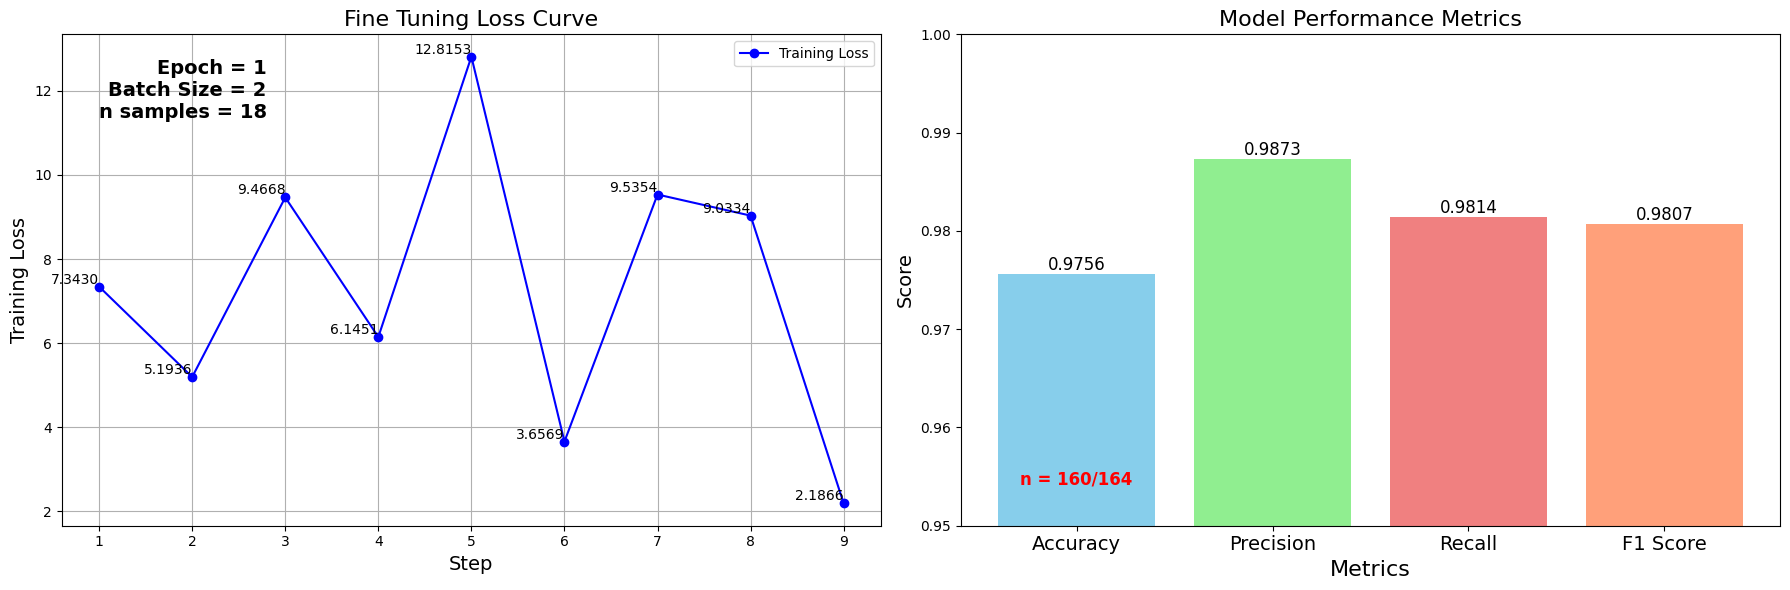

In [102]:
import matplotlib.pyplot as plt

# Data for the training loss (Left plot)
steps = [1, 2, 3, 4, 5, 6, 7, 8, 9]
training_loss = [7.343000, 5.193600, 9.466800, 6.145100, 12.815300, 3.656900, 9.535400, 9.033400, 2.186600]

# Metrics data (Right plot)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.9756, 0.9873, 0.9814, 0.9807]
n = "n = 160/164"  # Annotation for accuracy

# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the training loss curve (Left)
axs[0].plot(steps, training_loss, marker='o', linestyle='-', color='b', label='Training Loss')
for i in range(len(steps)):
    axs[0].text(steps[i], training_loss[i], f'{training_loss[i]:.4f}', ha='right', va='bottom')
axs[0].set_xlabel('Step', fontsize=14)
axs[0].set_ylabel('Training Loss', fontsize=14)
axs[0].set_title('Fine Tuning Loss Curve', fontsize=16)
axs[0].grid(True)
axs[0].legend()

# Add bold text annotation
axs[0].text(0.25, 0.95, "Epoch = 1\nBatch Size = 2\nn samples = 18",
            transform=axs[0].transAxes, fontsize=14, color='black', fontweight='bold',
            verticalalignment='top', horizontalalignment='right')

# Create the bar plot for metrics (Right)
bars = axs[1].bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
for bar, value in zip(bars, values):
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.4f}', ha='center', va='bottom', fontsize=12)
axs[1].text(bars[0].get_x() + bars[0].get_width() / 2, bars[0].get_height() - 0.02, n, ha='center', va='top', fontsize=12, color='red', fontweight='bold')
axs[1].set_xlabel('Metrics', fontsize=16)  # Increase font size for x-axis label
axs[1].set_ylabel('Score', fontsize=14)
axs[1].set_xticklabels(metrics, fontsize=14)  # Increase font size for x-axis tick labels
axs[1].set_title('Model Performance Metrics', fontsize=16)
axs[1].set_ylim(0.95, 1)  # Set a reasonable y-limit to better visualize differences

# Final layout adjustments and display
plt.tight_layout()
plt.savefig('training_1.jpeg', dpi=150)
plt.show()
